# Statistics

Data Science = Software Development + Statistics

In [ ]:
                            Stats
        Descriptive                           Inferential
    Univariate                                    Hypothesis Testing
    Bivariate                                     Model Fitting
    Multivariate

In [ ]:
- Univariate
1. Measure of Frequency - count
2. Central Tendency - mean, median, mode
                    - Geometric mean } ratio or rates
                    - Harmonic mean
3. Despersion
   - range
   - inter quartile range
   - variance
   - standard deviation

In [ ]:
                            Data
    Qualitative                            Quantitative
    

# Central Tendancy

In [1]:
import statistics

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/forbes.csv')

df.head()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


In [3]:
df.isnull()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,True
1997,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

Rank              0
Company           0
Country           0
Sales             0
Profits           0
Assets            0
Market Value      0
Sector          197
Industry        491
dtype: int64

In [5]:
df.dropna(inplace=True)

df.isnull().sum()

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          0
Market Value    0
Sector          0
Industry        0
dtype: int64

In [6]:
df.shape

(1508, 9)

In [7]:
market_value_mean = df['Market Value'].mean()

market_value_mean

26.978494031830294

## Mean Key Points

- best represents the data
- mean consider all the data points
- extremly sensitive to the presence of outliers


In [8]:
market_value_median = df['Market Value'].median()

market_value_median

13.1

## Median Key points

- It is less sensitive to outliers
- 50% of the data is either side of it.


In [9]:
df['Market Value'].min()

0.24

In [10]:
df['Market Value'].max()

752.0

In [11]:
range1 = df['Market Value'].max() - df['Market Value'].min()

range1

751.76

In [12]:
df.describe()

,Rank,Sales,Profits,Assets,Market Value
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,909.135279,19.623046,1.407430,97.647016,26.978494
std,554.044456,30.875809,3.244201,287.036157,47.099541
min,1.000000,0.001000,-13.000000,1.300000,0.240000
25%,433.750000,4.900000,0.349750,12.800000,7.300000
50%,883.500000,10.300000,0.692500,25.900000,13.100000
75%,1354.250000,19.900000,1.425000,60.325000,26.900000
max,1999.000000,485.300000,45.200000,3473.200000,752.000000


In [13]:
# sector column is a categorical variable

df['Sector'].value_counts()

Financials                    474
Consumer Discretionary        209
Industrials                   192
Materials                     145
Consumer Staples              106
Information Technology        103
Utilities                      86
Energy                         79
Health Care                    71
Telecommunication Services     43
Name: Sector, dtype: int64

In [14]:
df['Sector'].mode()

0    Financials
Name: Sector, dtype: object

## Mode

- the value that occured most in the data
- vote in an election
- mode is not good for continuous data.

# box plot

- mean
- median
- 25th percentile
- 75th percentile
- maximum values are where in the data
- outliers

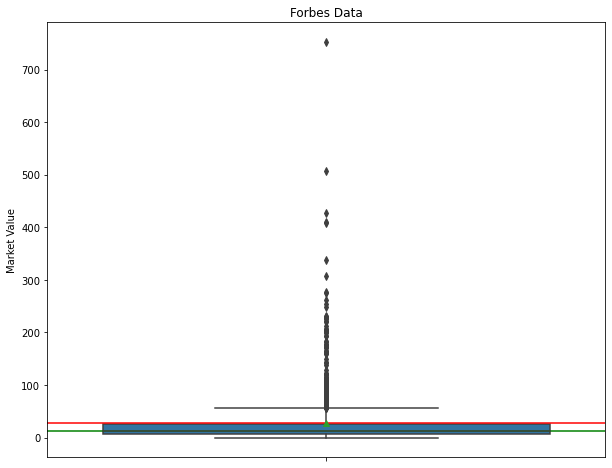

In [15]:
plt.figure(figsize=(10,8))

sns.boxplot(data=df, y = 'Market Value', showmeans=True)

plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_median, color='g', linestyle='-')

plt.title('Forbes Data')

plt.show()

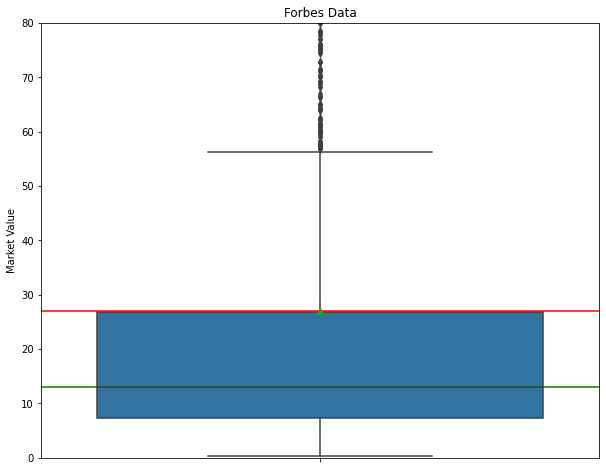

In [16]:
plt.figure(figsize=(10,8))

sns.boxplot(data=df, y = 'Market Value', showmeans=True)

plt.ylim(0,80)

plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_median, color='g', linestyle='-')

plt.title('Forbes Data')

plt.show()

# mode

In [17]:
gb = df.groupby('Sector', as_index=False).count()

gb

,Sector,Rank,Company,Country,Sales,Profits,Assets,Market Value,Industry
0,Consumer Discretionary,209,209,209,209,209,209,209,209
1,Consumer Staples,106,106,106,106,106,106,106,106
2,Energy,79,79,79,79,79,79,79,79
3,Financials,474,474,474,474,474,474,474,474
4,Health Care,71,71,71,71,71,71,71,71
5,Industrials,192,192,192,192,192,192,192,192
6,Information Technology,103,103,103,103,103,103,103,103
7,Materials,145,145,145,145,145,145,145,145
8,Telecommunication Services,43,43,43,43,43,43,43,43
9,Utilities,86,86,86,86,86,86,86,86


In [18]:
gb = gb[['Sector', 'Rank']]

gb = gb.sort_values(by='Rank', ascending=False)

gb

,Sector,Rank
3,Financials,474
0,Consumer Discretionary,209
5,Industrials,192
7,Materials,145
1,Consumer Staples,106
6,Information Technology,103
9,Utilities,86
2,Energy,79
4,Health Care,71
8,Telecommunication Services,43


# pie chart

- mode
- category wise display values
- percentage of values aquired by categories

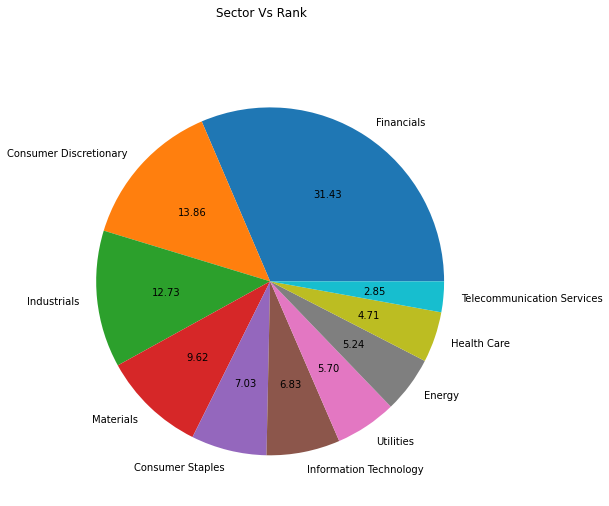

In [19]:
plt.figure(figsize=(10,8))

plt.pie(gb['Rank'], labels=gb['Sector'], autopct='%.2f')

plt.suptitle("Sector Vs Rank")

plt.show()

# Range

In [21]:
df.head()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


In [20]:
profit_max = df['Profits'].max()

profit_max

45.2

In [22]:
profit_min = df['Profits'].min()

profit_min

-13.0

In [23]:
profit_range = profit_max - profit_min

profit_range

58.2

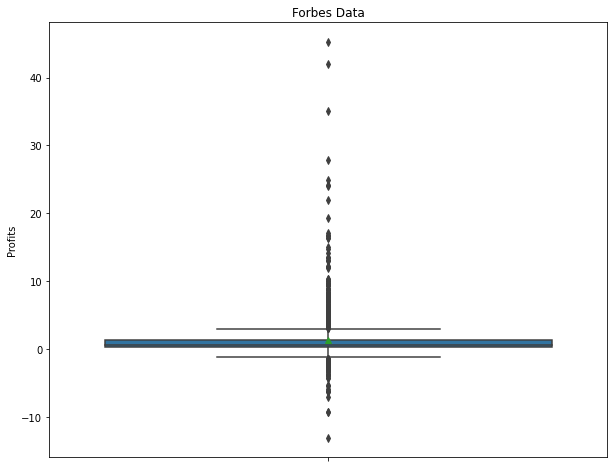

In [24]:
plt.figure(figsize=(10,8))

sns.boxplot(data = df, y = 'Profits', showmeans=True)

plt.title('Forbes Data')

plt.show()

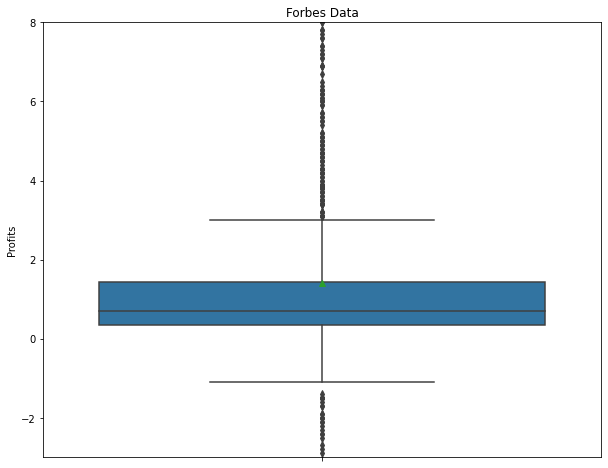

In [25]:
plt.figure(figsize=(10,8))

sns.boxplot(data = df, y = 'Profits', showmeans=True)

plt.ylim(-3,8)

plt.title('Forbes Data')

plt.show()

# Range

- range is sensitive to outliers

# Inter Quartile Range

In [26]:
# 25th percentile

Q1 = np.quantile(df['Profits'], 0.25)

Q1

0.34975

In [27]:
# 75th percentile

Q3 = np.quantile(df['Profits'], 0.75)

Q3

1.4249999999999998

In [28]:
IQR = Q3 - Q1

IQR

1.0752499999999998

# IQR

- resistant to outliers
- better than range